#Develop a neural network using backpropagation to classify images from the CIFAR-10 dataset. The dataset contains 60,000 32x32 color images divided into 10 classes (airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks).
#Your objective is to build a neural network model, train it using backpropagation, and evaluate its performance.

#Loading the CIFAR-10 Dataset: The CIFAR-10 dataset can be downloaded directly using libraries like tensorflow or keras:

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [6]:
# Normalize pixel values: Scale pixel values to be in the range [0, 1] by dividing by 255.

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [7]:
# One-hot encoding of class labels: Convert class labels to one-hot encoded format.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Split dataset: 50,000 for training and 10,000 for testing is already handled by CIFAR-10's structure.

For CIFAR-10, a feedforward neural network with the following architecture is appropriate:

Input Layer: Accepts the image of shape (32, 32, 3).

Hidden Layers: Use several layers:

*   A series of convolutional layers followed by max-pooling.
*   Dense layers before the output.

Output Layer: A softmax layer with 10 neurons to classify each image into one of the 10 classes.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


Justification:

Convolutional layers capture spatial features and reduce dimensionality via max-pooling.
Dense layers act as a classifier.
Dropout is applied to prevent overfitting.

**Activation Functions**

ReLU: Selected for the hidden layers as it is computationally efficient and reduces the vanishing gradient problem.

Softmax: Used in the output layer for multi-class classification.
Role of ReLU in Backpropagation:

ReLU is a simple non-linear function that helps to introduce non-linearity into the network. It allows for better backpropagation by not saturating gradients, unlike sigmoid or tanh.

In [9]:
# Loss Function and Optimizer

# Categorical Cross-Entropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mean Squared Error
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


#Loss Functions:
**Categorical Cross-Entropy (CCE):**

Description: Categorical Cross-Entropy is ideal for multi-class classification problems because it measures the dissimilarity between the true label (one-hot encoded) and the predicted probability distribution.

Why: It is the most appropriate loss function for classification tasks as it helps to maximize the likelihood of the correct class.

**Mean Squared Error (MSE):**
Description: MSE is commonly used in regression tasks. Here, we use it to compare the performance against Categorical Cross-Entropy, even though it is not ideal for classification.

Why Compare: MSE doesn't naturally handle probability distributions well, and it may lead to slower convergence and lower accuracy in classification tasks. Comparing it with Categorical Cross-Entropy will highlight why CCE is better suited for multi-class problems like CIFAR-10.

**Optimizer:**
We select Adam (Adaptive Moment Estimation) as the optimizer because:

Why Adam: Adam adapts the learning rates during training based on the first and second moments of the gradients. This allows for faster and more stable convergence compared to vanilla Stochastic Gradient Descent (SGD), which uses a fixed learning rate and can be slower to converge.

Convergence: Adam tends to converge faster in practice, making it suitable for complex datasets like CIFAR-10, where we aim to minimize training time while maintaining high performance.

#**How does learning rate influence backpropagation?**

If the learning rate is too high, the model might miss the optimal point. If it is too low, convergence can be slow. Adjust the learning rate dynamically using learning rate scheduling.

In [11]:
# Training the Model

history_cce = model.fit(X_train, y_train,
                        batch_size=128,
                        epochs=50,
                        validation_data=(X_test, y_test))

history_mse = model.fit(X_train, y_train,
                        batch_size=128,
                        epochs=50,
                        validation_data=(X_test, y_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 208ms/step - accuracy: 0.2576 - loss: 0.0828 - val_accuracy: 0.4824 - val_loss: 0.0662
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 191ms/step - accuracy: 0.4740 - loss: 0.0663 - val_accuracy: 0.5414 - val_loss: 0.0584
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 188ms/step - accuracy: 0.5382 - loss: 0.0593 - val_accuracy: 0.5700 - val_loss: 0.0555
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 188ms/step - accuracy: 0.5866 - loss: 0.0543 - val_accuracy: 0.6304 - val_loss: 0.0490
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 195ms/step - accuracy: 0.6245 - loss: 0.0504 - val_accuracy: 0.6363 - val_loss: 0.0484
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 187ms/step - accuracy: 0.6465 - loss: 0.0477 - val_accuracy: 0.6637 - val_loss: 0.0452
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 184ms/step - accuracy: 0.6657 - loss: 0.0451 - val_accuracy: 0.6726 - val_loss: 0.0441
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 184ms/step - accuracy: 0.6858 - loss: 0

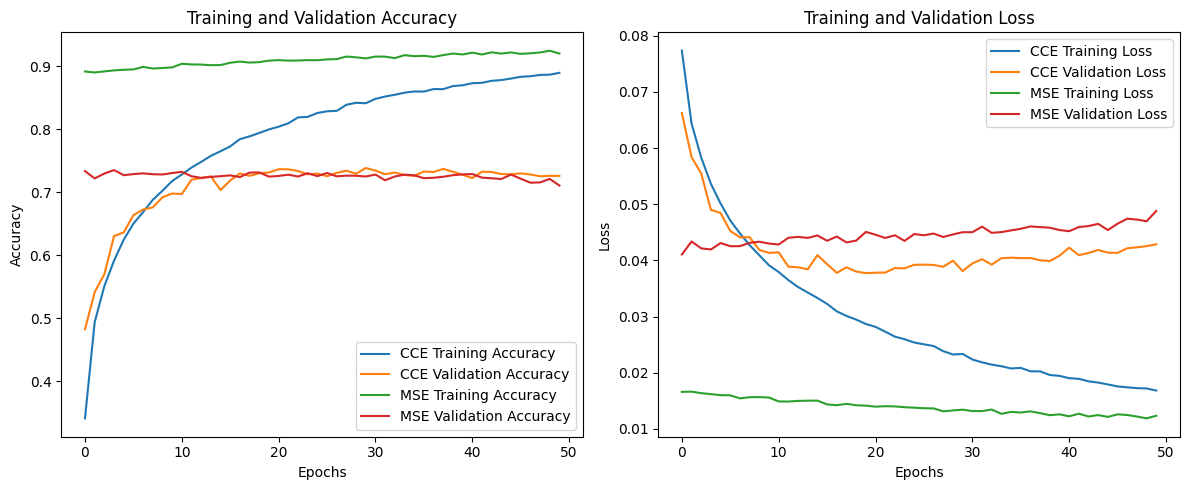

In [12]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_cce.history['accuracy'], label='CCE Training Accuracy')
plt.plot(history_cce.history['val_accuracy'], label='CCE Validation Accuracy')
plt.plot(history_mse.history['accuracy'], label='MSE Training Accuracy')
plt.plot(history_mse.history['val_accuracy'], label='MSE Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_cce.history['loss'], label='CCE Training Loss')
plt.plot(history_cce.history['val_loss'], label='CCE Validation Loss')
plt.plot(history_mse.history['loss'], label='MSE Training Loss')
plt.plot(history_mse.history['val_loss'], label='MSE Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#**How does backpropagation update the weights?**

Backpropagation uses the gradients computed from the loss function to adjust the weights and biases using the chain rule.

The learning rate determines the magnitude of these updates.

In [14]:
# Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions with the model trained using Categorical Cross-Entropy
# You need to set the model back to CCE before evaluation, as the model state changes after the second fit.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Predict with the model
y_pred_cce = model.predict(X_test)
y_pred_classes_cce = y_pred_cce.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Print confusion matrix and classification report for CCE
print("Confusion Matrix (CCE):")
print(confusion_matrix(y_true, y_pred_classes_cce))
print("\nClassification Report (CCE):")
print(classification_report(y_true, y_pred_classes_cce))

# Optionally, you can also evaluate the model trained using Mean Squared Error
# Make sure to set the model back to MSE state if you want to predict using it
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Predict with the model
y_pred_mse = model.predict(X_test)
y_pred_classes_mse = y_pred_mse.argmax(axis=1)

# Print confusion matrix and classification report for MSE
print("\nConfusion Matrix (MSE):")
print(confusion_matrix(y_true, y_pred_classes_mse))
print("\nClassification Report (MSE):")
print(classification_report(y_true, y_pred_classes_mse))



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Confusion Matrix (CCE):
[[764  15  62  14  20   4  10  13  85  13]
 [ 32 824  17   8   9   4  12   0  39  55]
 [ 57   2 658  72  60  37  79  15  15   5]
 [ 26   2  88 572  60 117  89  18  18  10]
 [ 26   4 102  69 646  21  74  48   8   2]
 [ 14   3  80 195  45 575  45  28   7   8]
 [  9   3  48  62  30  11 821   2  10   4]
 [ 30   6  64  56  87  63  15 670   3   6]
 [ 65  18  19  17   5   3   8   2 853  10]
 [ 56  82  26  21   5   7  20   8  50 725]]

Classification Report (CCE):
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.86      0.82      0.84      1000
           2       0.57      0.66      0.61      1000
           3       0.53      0.57      0.55      1000
           4       0.67      0.65      0.66      1000
           5       0.68      0.57      0.62      1000
           6       0.70      0.82      0.76      1000
           7       0.83      0.67      0

#**How to improve model performance if accuracy is low?**

Increase the depth or width of the network.

Use advanced techniques like transfer learning.

Apply data augmentation or batch normalization.

# Optimization Strategies
Early Stopping: Stops training once validation loss stops improving.

Learning Rate Scheduling: Adjusts learning rates based on performance.

Weight Initialization: Efficient initialization prevents gradient vanishing/exploding.

#**Why is weight initialization important?**

Poor initialization can lead to slow convergence or prevent the model from learning at all. Proper initialization ensures balanced weight updates during backpropagation.

# **Report**

#### The architecture of the network and justifications for the choices made.
- Input Layer: The first layer is a flatten layer that takes input images of shape (32, 32, 3) or a 2D image and converts it into a 1D array. This makes it easier to process by the Deep Learning Models.
- Hidden Layers:
Two Hidden layers are used with ReLU activations with 64 and 128 neurons respectively.
- Output Layer: A dense layer with 10 neurons (for each class) and softmax activation ensures multi-class classification, outputting a probability distribution.

#### Training and test accuracy with relevant plots showing loss and accuracy over the epochs.
From my Model, the accuracy Increased over time while my loss decreased. It was not steady but finally slowed down. After 50 epochs, I finally got an accuracy of 46% across all models with different loss functions.

#### Hyperparameter values used (learning rate, batch size, number of epochs, etc.).

For learning rate, I did not specify any learning rate while specifying my optimizer. Since i used adam optimizer, a learning rate of 0.001 was taken.
For Batch Size, i took a batch of 128 elements at once. For number of epochs, I ran my model for 50 epochs.
For my loss functions, i ran 2 loss functions and compared their results.
However, they provided the same accuracy after 50 epochs.

#### A brief discussion of the challenges you faced and how you addressed them.
- As the dataset was large an I had to train the data on 50 epochs. I wasted alot of time correcting my code and rerunning the 50 epochs. So i reduced the epochs to 5, ran my code, fixed my errors and then changed the epochs to 50. I also needed to run 2 loss functions which increased the overall runtime of my program.
